In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from collections import Counter
import emoji
import re 
from hazm import Normalizer, word_tokenize, stopwords_list
from wordcloud import WordCloud


In [2]:
df = pd.read_csv('data/Persian_irony_detection.csv')

In [3]:
df.shape

(14946, 2)

In [4]:
df.head()

,tweet,label
0,از من پیرمرد به شما وصیت برای احدی، تاکید می‌ک...,0
1,شما مجوز بده ملت یه ماشین استاندارد بتونن بیار...,0
2,تو دیت اول دختره دید خیلی زشتم، میخواست پاشه ب...,1
3,تو اکیپ دخترونه همیشه یکی هست که پایه همه قرار...,0
4,از حدود 500 نفری که در مراسم سالگرد پدر همسرم ...,0


In [5]:
df.label.value_counts()

label
0    7932
1    7014
Name: count, dtype: int64

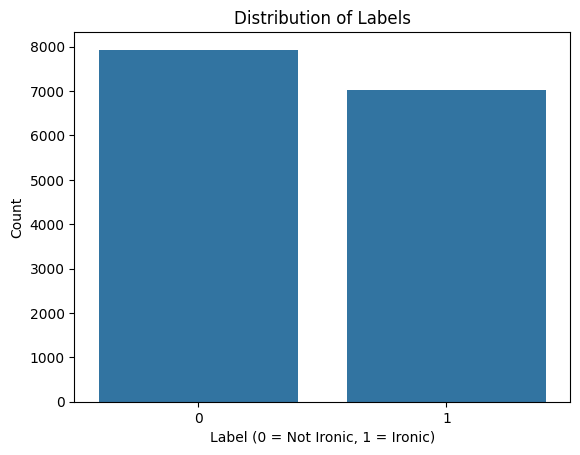

In [6]:
sns.countplot(x='label', data=df)
plt.title("Distribution of Labels")
plt.xlabel("Label (0 = Not Ironic, 1 = Ironic)")
plt.ylabel("Count")
plt.show()

In [7]:
# Length of tweets
print('Min Length twit:' ,np.min(df['tweet'].apply(len)))
print('Max Length twit:' ,np.max(df['tweet'].apply(len)))
print('Mean Length twit:' ,round(np.mean(df['tweet'].apply(len))))
print('Median Length twit:' ,np.median(df['tweet'].apply(len)))


Min Length twit: 16
Max Length twit: 2089
Mean Length twit: 181
Median Length twit: 144.0


In [8]:
# Word count

print("Min word count: ",np.min(df['tweet'].apply(lambda x: len(str(x).split()))))
print("Max word count: ",np.max(df['tweet'].apply(lambda x: len(str(x).split()))))
print("Mean word count: ",round(np.mean(df['tweet'].apply(lambda x: len(str(x).split())))))
print("Median word count: ",np.median(df['tweet'].apply(lambda x: len(str(x).split()))))




Min word count:  3
Max word count:  390
Mean word count:  35
Median word count:  29.0


In [9]:
df['char_count'] = df['tweet'].apply(len)
df['word_count'] = df['tweet'].apply(lambda x: len(str(x).split()))


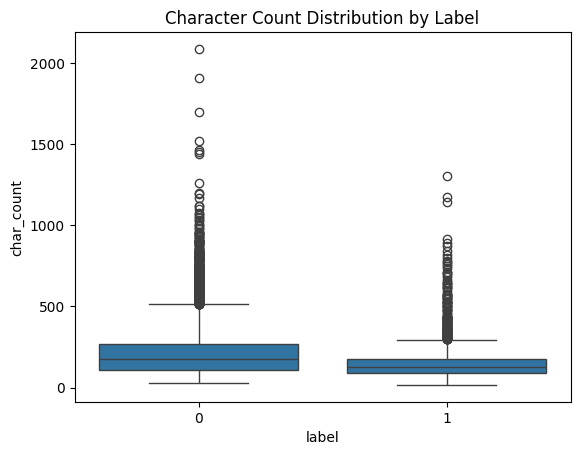

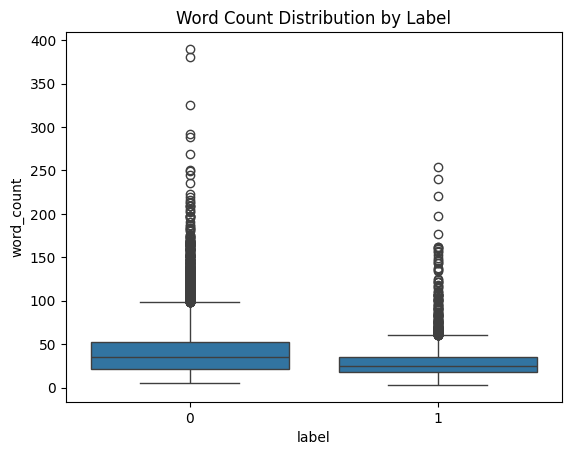

In [10]:
sns.boxplot(x='label', y='char_count', data=df)
plt.title("Character Count Distribution by Label")
plt.show()

sns.boxplot(x='label', y='word_count', data=df)
plt.title("Word Count Distribution by Label")
plt.show()


In [11]:
!pip install emoji

In [12]:
def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.EMOJI_DATA)

df['emojis'] = df['tweet'].apply(extract_emojis)


In [13]:
ironic_emojis = ''.join(df[df['label'] == 1]['emojis'])
non_ironic_emojis = ''.join(df[df['label'] == 0]['emojis'])

top_ironic_emojis = Counter(ironic_emojis).most_common(15)
top_non_ironic_emojis = Counter(non_ironic_emojis).most_common(15)

print("Top ironic emojis:", top_ironic_emojis)
print("Top non-ironic emojis:", top_non_ironic_emojis)

Top ironic emojis: [('😂', 770), ('🔹', 288), ('😐', 147), ('🤣', 63), ('🔴', 53), ('🔋', 43), ('📱', 42), ('🏻', 40), ('🤦', 38), ('♂', 36), ('🔺', 33), ('😑', 32), ('🔸', 29), ('🙂', 21), ('🚶', 19)]
Top non-ironic emojis: [('🔹', 3961), ('💢', 760), ('🔴', 426), ('🔺', 374), ('🔸', 345), ('▫', 147), ('🔻', 110), ('😂', 107), ('⭕', 98), ('⚽', 72), ('♦', 47), ('🚨', 32), ('😐', 26), ('🏻', 25), ('▪', 23)]


In [14]:
!pip install hazm


In [15]:
def filter_emojis(text):
    important_emojis = ['😂', '😐', '😑', '😒', '🙂', '😔', '🚶']
    return ''.join([ch for ch in text if (ch.isalnum() or ch.isspace() or ch in important_emojis)])


In [16]:
normalizer = Normalizer()
stopwords = set(stopwords_list())

def clean_text_pipeline(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)

    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    text = re.sub(r'(.)\1{2,}', r'\1', text)

    text = re.sub(r'[^آ-یa-zA-Z0-9\s\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF]', '', text)

    text = filter_emojis(text)
    text = text.replace('ي', 'ی').replace('ك', 'ک')
    
    text = re.sub(r'[‌\u200c]', ' ', text)  
 
    text = re.sub(r'\b[a-zA-Z]+\b', '', text)
    text = re.sub(r'[a-zA-Z]+', '', text)



  


    text = re.sub(r'\s+', ' ', text).strip()


    text = normalizer.normalize(text)





    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stopwords]

    return ' '.join(tokens)


In [17]:
df['clean_tweet'] = df['tweet'].apply(clean_text_pipeline)


In [18]:
df = df[df['clean_tweet'].str.split().str.len() >= 3]

df = df.drop_duplicates(subset='clean_tweet')

In [19]:
# df.head()

In [20]:
for i in range(5):
    print(f"\n اصل: {df['tweet'].iloc[i]}")
    print(f" تمیزشده: {df['clean_tweet'].iloc[i]}")



 اصل: از من پیرمرد به شما وصیت برای احدی، تاکید می‌کنم برای احدی درد دل نکنید، بعدش از پشیمونی سنگ پیدا نمی‌کنید دندون‌هاتونو خرد کنید.
 تمیزشده: پیرمرد وصیت احدی تاکید احدی درد دل نکنید بعدش پشیمونی سنگ نمی‌کنید دندونهاتونو خرد

 اصل: شما مجوز بده ملت یه ماشین استاندارد بتونن بیارن سوار شن که جونشون رو تو ماشینای بی کیفیت 40-50 سال پیش کره‌ای و فرانسوی از دست ندن ما قول میدیم درخواست بنز و بی ام و یا پورشه و مازراتی نداشته باشیم ولی جان عزیزتون یه چیزی بیارید که بدتر از پرایدو پژو 405 نباشه
 تمیزشده: مجوز بده ملت یه ماشین استاندارد بتونن بیارن سوار شن جونشون ماشینای بی‌کیفیت ۴۰۵۰ سال کرهای فرانسوی دست ندن قول میدیم درخواست بنز بی‌ام پورشه مازراتی نداشته_باشیم جان عزیزتون یه بیارید بدتر پرایدو پژو ۴۰۵ نباشه

 اصل: تو دیت اول دختره دید خیلی زشتم، میخواست پاشه بره. آینه‌ی دستشوییمون رو از زیر میز درآوردم و مایل گرفتم کنار صورتم. گفتم دلت میاد؟
 تمیزشده: دیت دختره دید زشتم می‌خواست پاشه بره آینهی دستشوییمون میز درآوردم مایل گرفتم صورتم گفتم دلت میاد

 اصل: تو اکیپ دخترونه همیشه یکی هست ک

In [21]:

def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.EMOJI_DATA)

df['emojis'] = df['clean_tweet'].apply(extract_emojis)

ironic_emojis = ''.join(df[df['label'] == 1]['emojis'])
non_ironic_emojis = ''.join(df[df['label'] == 0]['emojis'])

top_ironic_emojis = Counter(ironic_emojis).most_common(15)
top_non_ironic_emojis = Counter(non_ironic_emojis).most_common(15)

print("Top ironic emojis:", top_ironic_emojis)
print("Top non-ironic emojis:", top_non_ironic_emojis)

Top ironic emojis: [('😂', 597), ('😐', 116), ('😑', 21), ('🚶', 19), ('🙂', 15), ('😔', 15), ('😒', 14)]
Top non-ironic emojis: [('😂', 69), ('😐', 23), ('🙂', 9), ('😔', 7), ('😑', 7), ('😒', 5), ('🚶', 4)]


In [22]:
emoji_translate = {
    "face with tears of joy": " خنده" ,
    "neutral face": " بی‌تفاوت",
    "unamused face": " بی‌حوصله",
    "white circle": " دایره سفید",
    "red circle": " دایره قرمز",
    "battery": " باتری",
    "mobile phone": " موبایل",
    "white square": " مربع سفید",
    "small red triangle": " مثلث قرمز",
    "slightly smiling face": " لبخند",
    "disappointed face": " ناراحتی",
    "pouting face": " اخم",
    "person walking": " راه رفتن",
    "bust in silhouette": " چهره",
    "strong": " قوی"
}

def replace_emojis_with_meaning(text):
    text_with_emojis = emoji.demojize(text)

    matches = re.findall(r':(.*?):', text_with_emojis)

    for match in matches:
        readable = match.replace("_", " ")
        translated = emoji_translate.get(readable, readable)  
        text_with_emojis = text_with_emojis.replace(f":{match}:", translated)

    return text_with_emojis



df['tweet_with_emoji_meaning'] = df['clean_tweet'].apply(replace_emojis_with_meaning)

In [23]:
df.head()

,tweet,label,char_count,word_count,emojis,clean_tweet,tweet_with_emoji_meaning
0,از من پیرمرد به شما وصیت برای احدی، تاکید می‌ک...,0,129,24,,پیرمرد وصیت احدی تاکید احدی درد دل نکنید بعدش ...,پیرمرد وصیت احدی تاکید احدی درد دل نکنید بعدش ...
1,شما مجوز بده ملت یه ماشین استاندارد بتونن بیار...,0,260,55,,مجوز بده ملت یه ماشین استاندارد بتونن بیارن سو...,مجوز بده ملت یه ماشین استاندارد بتونن بیارن سو...
2,تو دیت اول دختره دید خیلی زشتم، میخواست پاشه ب...,1,129,25,,دیت دختره دید زشتم می‌خواست پاشه بره آینهی دست...,دیت دختره دید زشتم می‌خواست پاشه بره آینهی دست...
3,تو اکیپ دخترونه همیشه یکی هست که پایه همه قرار...,0,270,58,,اکیپ دخترونه هست پایه قراراست کلاس نمیذاره زود...,اکیپ دخترونه هست پایه قراراست کلاس نمیذاره زود...
4,از حدود 500 نفری که در مراسم سالگرد پدر همسرم ...,0,237,52,,۵۰۰ نفری مراسم سالگرد پدر همسرم شرکت فوتی‌های ...,۵۰۰ نفری مراسم سالگرد پدر همسرم شرکت فوتی‌های ...


In [24]:
df['tweet_with_emoji_meaning'] = df['tweet_with_emoji_meaning'].str.replace(r'\bیه\b', '', regex=True)
df['tweet_with_emoji_meaning'] = df['tweet_with_emoji_meaning'].str.replace(r'ها', '', regex=True)
df['tweet_with_emoji_meaning'] = df['tweet_with_emoji_meaning'].str.replace(r'های', '', regex=True)



In [25]:
ironic_texts = df[df['label'] == 1]['tweet_with_emoji_meaning']
non_ironic_texts = df[df['label'] == 0]['tweet_with_emoji_meaning']


tokens_ironic = [word for text in ironic_texts for word in word_tokenize(text)]
tokens_non_ironic = [word for text in non_ironic_texts for word in word_tokenize(text)]

freq_ironic = Counter(tokens_ironic)
freq_non_ironic = Counter(tokens_non_ironic)

print("Top 20 ironic words:\n", freq_ironic.most_common(20))
print("Top 20 non-ironic words:\n", freq_non_ironic.most_common(20))

Top 20 ironic words:
 [('گفتم', 890), ('دیگه', 686), ('خنده', 629), ('اون', 598), ('میگه', 573), ('میشه', 563), ('اگه', 532), ('الان', 530), ('داره', 528), ('بابام', 432), ('روز', 420), ('سال', 395), ('خونه', 392), ('میکنه', 382), ('بهش', 362), ('چی', 339), ('دارم', 330), ('سر', 321), ('کنه', 318), ('توی', 315)]
Top 20 non-ironic words:
 [('ایران', 873), ('سال', 778), ('روز', 738), ('روسیه', 736), ('اون', 664), ('میشه', 649), ('اوکراین', 637), ('کشور', 633), ('تهران', 608), ('اعلام', 602), ('نفر', 591), ('دیگه', 585), ('اگه', 537), ('تیم', 513), ('داره', 509), ('کار', 488), ('ساعت', 478), ('زندگی', 448), ('باشه', 438), ('میکنه', 422)]


In [26]:
ironic_text  = df[df['label'] == 1]['tweet_with_emoji_meaning']
non_ironic_text  = df[df['label'] == 0]['tweet_with_emoji_meaning']

ironic_text = ' '.join(ironic_texts)
non_ironic_text = ' '.join(non_ironic_texts)

font_path = '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf'

wordcloud_ironic = WordCloud(font_path=font_path, background_color='white', width=800, height=600).generate(ironic_text)
wordcloud_non_ironic = WordCloud(font_path=font_path, background_color='white', width=800, height=600).generate(non_ironic_text)

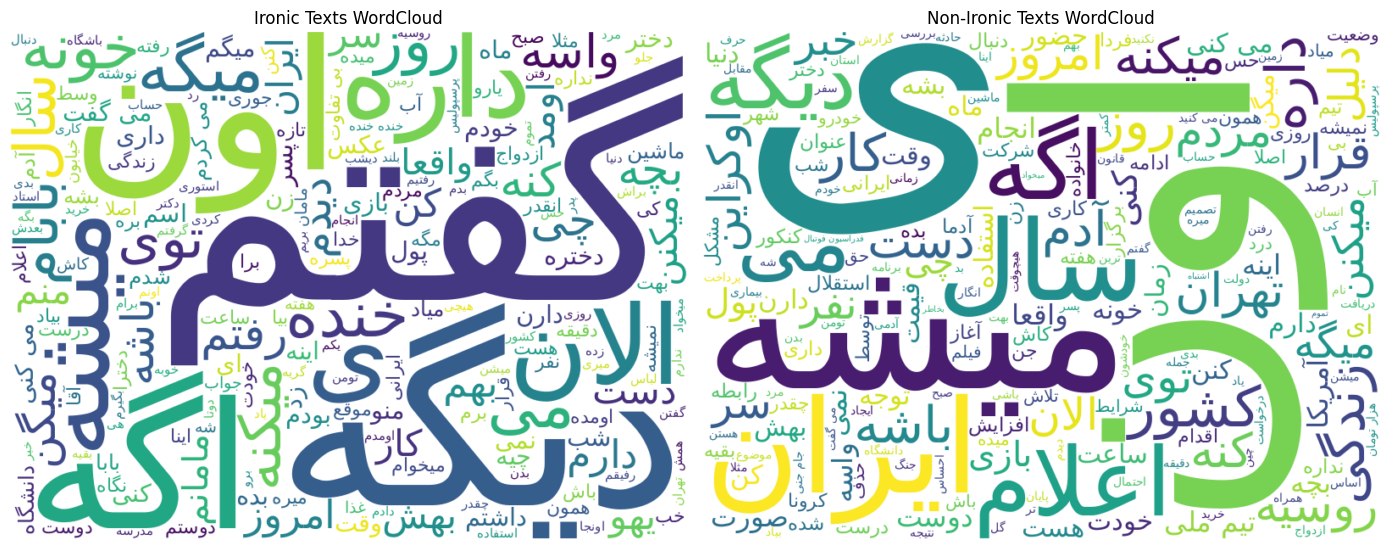

In [27]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_ironic, interpolation='bilinear')
plt.axis('off')
plt.title('Ironic Texts WordCloud')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_ironic, interpolation='bilinear')
plt.axis('off')
plt.title('Non-Ironic Texts WordCloud')

plt.tight_layout()
plt.show()

In [30]:
new_df = df[['tweet_with_emoji_meaning', 'label']]
new_df.to_csv('data/Preprocessed_data.csv', index=False)